<a href="https://colab.research.google.com/github/ezta91/Esther-Erommonsele/blob/main/VOTING_CLF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df=pd.get_dummies(df, dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [4]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
base_models=[('lr',LogisticRegression()),('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()),('svc',SVC())]

VCLF=VotingClassifier(estimators=base_models,voting='hard')

VCLFS=VotingClassifier(estimators=base_models,voting='soft')

In [6]:
VCLF.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [7]:
y_pred=VCLF.predict(x_test)

accuracy score: 0.805
confusion matrix:
 [[1589    6]
 [ 384   21]]
classification report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1595
           1       0.78      0.05      0.10       405

    accuracy                           0.81      2000
   macro avg       0.79      0.52      0.49      2000
weighted avg       0.80      0.81      0.73      2000

f1 score: 0.09722222222222222
precision score: 0.7777777777777778
recall score: 0.05185185185185185
confusion matrix:


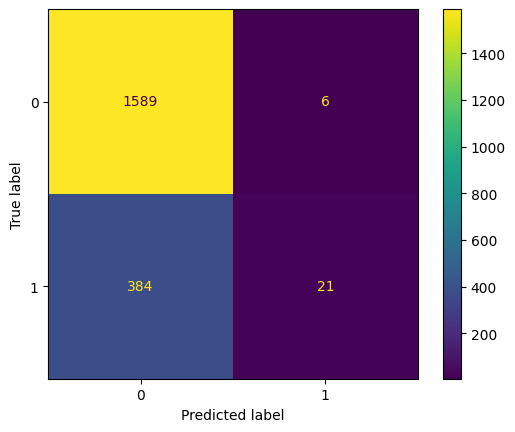

In [8]:
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('classification report:\n',classification_report(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print('precision score:',precision_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('confusion matrix:\n',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot())

In [9]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [10]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)

In [11]:
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [12]:
VCLF.fit(x_train_sm,y_train_sm)

y_pred  =VCLF.predict(x_test)

accuracy score: 0.8375
confusion matrix:
 [[1454  141]
 [ 184  221]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1595
           1       0.61      0.55      0.58       405

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000

f1 score: 0.576271186440678
precision score: 0.6104972375690608
recall score: 0.5456790123456791
confusion matrix:


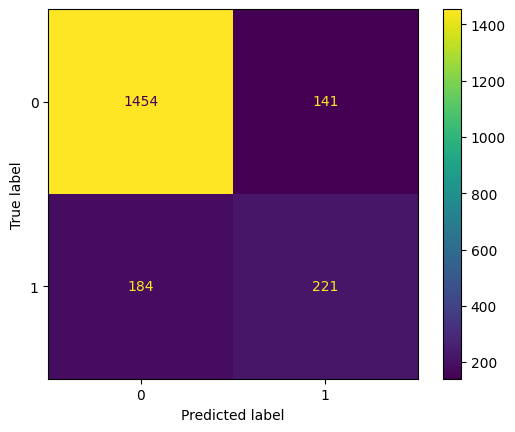

In [13]:
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('classification report:\n',classification_report(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print('precision score:',precision_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('confusion matrix:\n',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot())